# Exercises on non-linear regression

## Exercise 1: Gradient descent

In this exercise, you wil learn how the gradient descent algorithm works and how to implement it yourself. <br>
The goal here will be to find the minimum of the function: f(x, y) = sin(x) * cos(y), using the gradient descent algorithm.

In [25]:
#As usual, we import the libraries we will need during the coding

import numpy as np
import matplotlib.pyplot as plt

### Visualize the function

Before implementing the gradient descent algorithm, let's take a look at how the function looks like.

What do you observe and how will it impact the gradient descent algorithm?

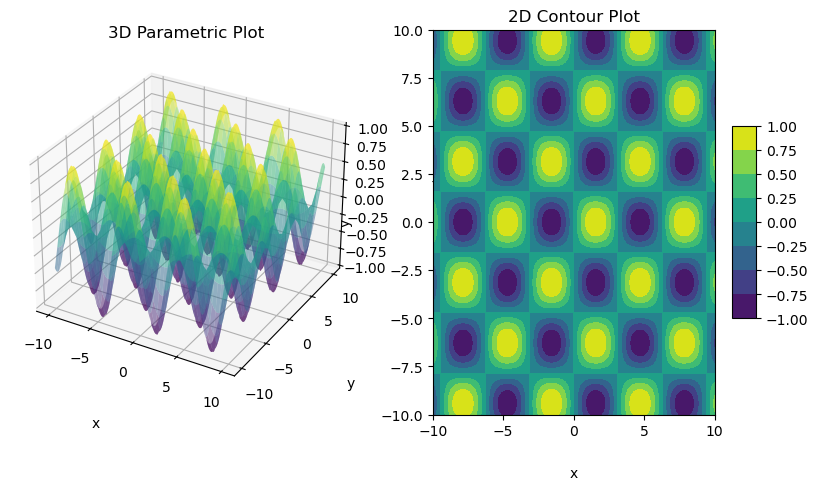

In [26]:
x= np.linspace(-10, 10, 1000)
y= np.linspace(-10, 10, 1000)

X, Y = np.meshgrid(x, y)

Z = np.sin(X) *np.cos(Y)

# Create Plots
fig= plt.figure(figsize=(10,5))

# Subplot 1: 3D Parametric Plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.grid()
surf = ax.plot_surface(X, Y, Z, cmap=plt.get_cmap('viridis'),alpha= 0.5 )
ax.set_title('3D Parametric Plot')

ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('f', labelpad=20)


# Subplot 2: 2D Contour Plot

ax = fig.add_subplot(1, 2, 2)
surf = ax.contourf(X, Y, Z, cmap=plt.get_cmap('viridis') )
ax.set_title('2D Contour Plot')
fig.colorbar(surf, shrink=0.5, aspect=8)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
plt.show()

### Gradient descent

We will write the gradient descent in form of a function with the following properties:

Input:
- The starting point (coordinates in x and y): `start_indepvar`
- The learning rate : `learning_rate`
- The number of iterations : `num_iterations` 

Output:
- The end point (coordinates in x and y): `indepvar`
- The minimum function value after optimization : `z`
- The history of (x, y, z) over the iterations : `history` 

Steps:
- Calculate the function value $\boldsymbol{z}_k = f(\boldsymbol{x}_k)$
- Calculate next point as $\boldsymbol{x}_{k+1} = \boldsymbol{x}_k - \delta* \nabla f(\boldsymbol{x}_k)$ (gradient descent step)
- Check convergence :  $|f(\boldsymbol{x}_{k+1} - f(\boldsymbol{x}_k)|< \epsilon$
- Save the solution : `history`

Variables:
- Learning rate: $\delta$
- Threshold to stop the algorithm if convergence is reached: $\epsilon$
- Maximum number of iterations of the gradient descent algorithm: `num_iterations`
- Direction to locally decrease the function value: $\nabla f(\boldsymbol{x}_k)$

As you can observe in the steps above, we have to evaluate the function and compute its gradient at every iteration. Therefore, it is easier if we implement some help functions before to do these two tasks.


╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌
#### Help functions: evaluate the function f and compute gradient of this same function

Recall: f(x, y) = sin(x) * cos(y)<br>

function`f(indepvar)`:
- **description**: Evaluates the function f at coordinates (x, y)
- **input**: `indepvar` = array of (2,) $\boldsymbol{x} = [x,y]$
- **output**: `z` = array of (1,)


╌╌╌╌╌╌╌╌╌╌

function`grad_f(indepvar)`:
- **description**: Computes the gradient of function f at coordinates (x, y), which corresponds to computing the partial derivate with respect to x and y $ \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right) $
- **input** : `indepvar` = array of (2,): $\boldsymbol{x} = [x,y]$
- **output**: `grad` = array of (2,): $\nabla f(\boldsymbol{x}_k) = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right)\Big|_{\boldsymbol{x}_k} $

In [ ]:
# Define the function to be minimized (f(x,y) = sin(x) * cos(y)):
def f(indepvar):
    x = ...; y = ... #retrieve the values x and y from indepvar
    z = ... #use the function and the values x and y
    return z

# Define the partial derivatives of the function (f(x,y) = sin(x) * cos(y)) with respect to x and y
def grad_f(indepvar):
    grad = ... #initialize the grad array
    x = ...; y = ... #gretrieve the values x and y from indepvar
    grad[0] =  ...  # df_dx
    grad[1] =  ... # df_dy
    return grad

#### Gradient descent function
The goal is to write here the following steps of the gradient descent in the function below.

Steps:
- Calculate the function value $\boldsymbol{z}_k = f(\boldsymbol{x}_k)$
- Calculate next point as $\boldsymbol{x}_{k+1} = \boldsymbol{x}_k - \delta* \nabla f(\boldsymbol{x}_k)$ (gradient descent step)
- Check convergence :  $|f(\boldsymbol{x}_{k+1} - f(\boldsymbol{x}_k)|< \epsilon$
- Save the solution : `history`

In [ ]:
# Define the gradient descent algorithm
def gradient_descent(start_indepvar, learning_rate, num_iterations):

    # Initialize values
    indepvar0 = ...
    z0        = ...
    
    #Parameters
    epsilon = 0.001
    history = ... #initialize the history with zeros (size = (num_iterations, 3))
    
    # Perform the gradient descent iterations
    for i in range(num_iterations):
        # Calculate the gradients
        grad = ...
        
        # Update values
        indepvar = ...
        z        = ...
        
        # Save the history of the parameters
        history[i,:]=  ...
        
        # Check convergence 
        if (abs(z-z0)<epsilon ):
            #reshape history and break
            history = history[:i,:]
            break
        else:
            # reinitialize state 0:
            indepvar0 = ...; z0=...
    print(f'Last iteration n= {i+1}; Minimal function value = {z}; abs(z-z0)= {abs(z-z0)}')
    return indepvar, z, history

Execute the gradient descent function and see what happens.

1) What do you observe?

2) Afterwards, re-execute the code with other starting points (for example [5, 4]).<br>
Can you explain what you observe?

Last iteration n= 29; Minimal function value = -0.9962995077162606; abs(z-z0)= 0.0008656245808136287


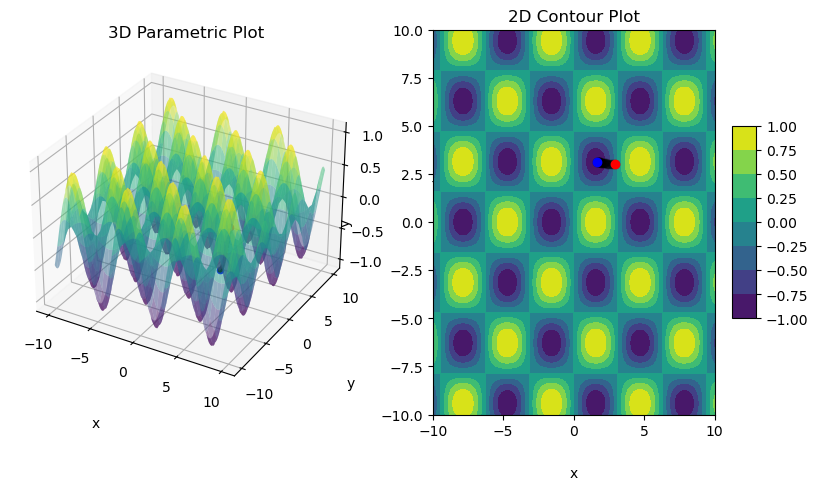

In [ ]:
# Perform gradient descent and plot the results
start_xy = [3, 3]
learning_rate = 0.1
num_iterations = 100
indepvar_opt, f_opt, history = ... #Use the gradient descent function that you just defined



# Create Plots
fig= plt.figure(figsize=(10,5))

# Subplot 1: 3D Parametric Plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.grid()
surf = ax.plot_surface(X, Y, Z, cmap=plt.get_cmap('viridis'),alpha= 0.5 )
ax.set_title('3D Parametric Plot')
ax.scatter(*zip(*history), c='k', marker='o', s=5)
ax.scatter(*history[0], c='r', marker='o')
ax.scatter(*history[len(history)-1], c='b', marker='o')

ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('f', labelpad=20)


# Subplot 2: 2D Contour Plot

ax = fig.add_subplot(1, 2, 2)
surf = ax.contourf(X, Y, Z, cmap=plt.get_cmap('viridis') )
ax.set_title('2D Contour Plot')
fig.colorbar(surf, shrink=0.5, aspect=8)

nit= history.shape[0]

for it in range(nit-1):
    plt.scatter(history[it,0], history[it,1], c='k', alpha=0.2)

plt.scatter(history[0,0], history[0,1] , c='r') # init
plt.scatter(history[nit-1,0], history[nit-1,1] , c='b') # end


# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
plt.show()

Visualize the evolution of the z-value over the iterations of the gradient descent algorithm

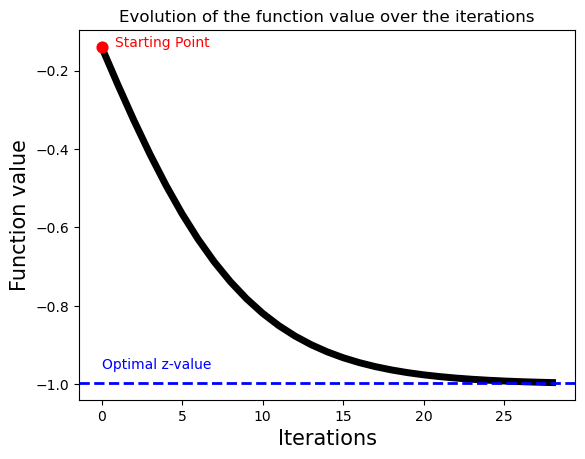

In [ ]:
#create a plot that visualizes the evolution of the error over the iterations

plt.plot(...)
plt.show()

### Gradient descent  estimated:

Not always we know analitically the function of the gradient of the function.<br>
We will estimate the gradient by computing the slope between two points close to each other.

We will create a function called `gradient_descent_estimated` that estimates the gradient.
 - To do:
     - Create the function similarly as before
     - Calculate the difference between the estimated gradient and the exact one at the last iteration

In [ ]:
# Define the gradient descent algorithm with estimation of the gradient
def gradient_descent_estimated(start_indepvar, learning_rate, num_iterations):

    # Initialize values
    indepvar0 = ...
    z0 = ...
    
    #Parameters
    epsilon = 0.001
    history = ...
    
    # Perform the gradient descent iterations
    for i in range(num_iterations):

        # Calculate the estimated gradients by computing the linear slope in the x and y direction in the current point
        dx= 0.01; grad_x = ...
        dy= 0.01; grad_y = ...
        
        grad = ... #combine grad_x and grad_y
        
        # Update values
        indepvar = ...
        z = ...
        
        # Save the history of the parameters
        history[i,:]=  ...
        
        # Check convergence 
        if (abs(z-z0)<epsilon ):
            #reshape history and break
            history = history[:i,:]
            break
        else:
            # reinitialize state 0:
            indepvar0 = ...; z0=...
    
    print(f'Last iteration n= {i+1}; Minimal function value = {z}; abs(z-z0) = {abs(z-z0)}')
    print(f'diff in grad = {grad - grad_f(indepvar)}')
    
    return indepvar, z, history

Apply now the estimated gradient descent algorithm

Last iteration n= 29; Minimal function value = -0.9966060103184105; abs(z-z0) = 0.0008331711129878627
diff in grad = [0.01443268 0.00364933]


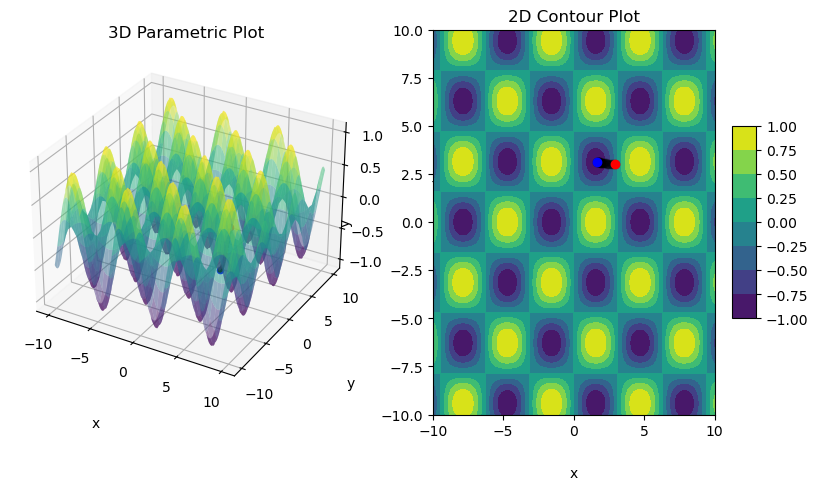

In [ ]:
# Perform gradient descent and plot the results
start_xy = [3, 3]
learning_rate = 0.1
num_iterations = 1000
indepvar_opt, f_opt, history_est = ... #Use the estimated gradient descent function that you just implemented



# Create Plots
fig= plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.grid()
surf = ax.plot_surface(X, Y, Z, cmap=plt.get_cmap('viridis'),alpha= 0.5 )
ax.set_title('3D Parametric Plot')
ax.scatter(*zip(*history_est), c='k', marker='o', s=5)
ax.scatter(*history_est[0], c='r', marker='o')
ax.scatter(*history_est[len(history_est)-1], c='b', marker='o')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('f', labelpad=20)

ax = fig.add_subplot(1, 2, 2)
surf = ax.contourf(X, Y, Z, cmap=plt.get_cmap('viridis') )
ax.set_title('2D Contour Plot')
fig.colorbar(surf, shrink=0.5, aspect=8)

nit= history_est.shape[0]

for it in range(nit-1):
    plt.scatter(history_est[it,0], history_est[it,1], c='k', alpha=0.2)

plt.scatter(history_est[0,0], history_est[0,1] , c='r') # init
plt.scatter(history_est[nit-1,0], history_est[nit-1,1] , c='b') # end

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
plt.show()

Difference between using the exact gradient and the estimated gradient by zooming in on the region we are interested in

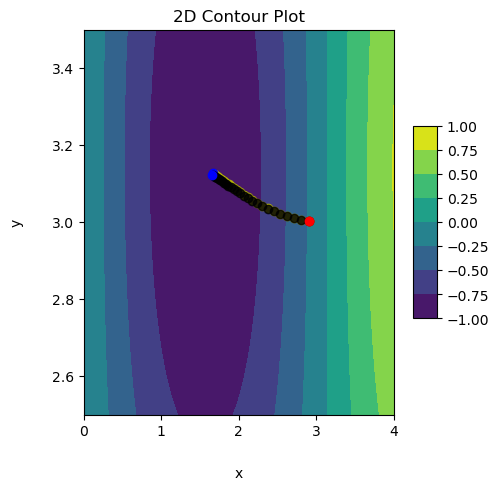

In [9]:
fig = plt.figure(figsize=(5, 5))

# 2D Contour Plot
ax = fig.add_subplot(111)
surf = ax.contourf(X, Y, Z, cmap=plt.get_cmap('viridis'))
ax.set_title('2D Contour Plot')
fig.colorbar(surf, shrink=0.5, aspect=8)

nit = history.shape[0]

# plot for the estimated gradient
for it in range(nit-1):
    plt.scatter(history[it, 0], history[it, 1], c='y', alpha=0.8)

plt.scatter(history[0, 0], history[0, 1], c='r')  # init
plt.scatter(history[nit-1, 0], history[nit-1, 1], c='b')  # end

# plot for the estimated gradient
nit = history_est.shape[0]

for it in range(nit-1):
    plt.scatter(history_est[it, 0], history_est[it, 1], c='k', alpha=0.8)

plt.scatter(history_est[0, 0], history_est[0, 1], c='r')  # init
plt.scatter(history_est[nit-1, 0], history_est[nit-1, 1], c='b')  # end

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)

# Set the limits of the plot to zoom in on the interesting region
ax.set_xlim([0, 4])
ax.set_ylim([2.5,3.5])

plt.show()

### Gradient descent  using scipy.optimize:

We will use scipy.optimize library to obtain the minimum of our function

To do: implement the function `scipy.optimize.fmin` to obtain the value of 'indepvar' that minimizes the function f(indepvar)

Check the documentation on how to use this function:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html

In [ ]:
import scipy.optimize

start_xy = [3, 3]
#retall = True: returns the solutions of all the iterations
[indepvar_opt, indepvar_all] = ...

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 35
         Function evaluations: 68


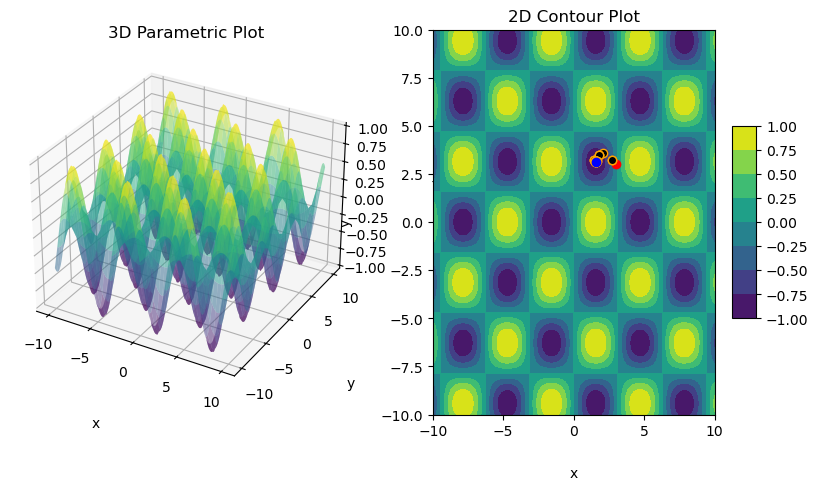

In [ ]:
# Once you implemented the scipy optimization function, you can run this function to visualize how the solution is converging to the minimum

# Create Plots
fig= plt.figure(figsize=(10,5))

# Subplot 1: 3D Parametric Plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.grid()
surf = ax.plot_surface(X, Y, Z, cmap=plt.get_cmap('viridis'),alpha= 0.5 )
ax.set_title('3D Parametric Plot')

ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('f', labelpad=20)


# Subplot 2: 2D Contour Plot
ax = fig.add_subplot(1, 2, 2)
surf = ax.contourf(X, Y, Z, cmap=plt.get_cmap('viridis') )
ax.set_title('2D Contour Plot')
fig.colorbar(surf, shrink=0.5, aspect=8)

nit= len(indepvar_all)

it=0; plt.scatter(indepvar_all[it][0], indepvar_all[it][1] , c='r') #init

for it in np.arange(1,nit): 
    plt.scatter(indepvar_all[it][0], indepvar_all[it][1],  c='black', edgecolors='orange', alpha=1)

plt.scatter(indepvar_all[it][0], indepvar_all[it][1], c='b') #end

ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
plt.show()

Zoom in on the region where we are interested in.

What do you observe and how do you explain it? Compare also the optimal values and the number of iterations with the ones obtained with the techniques you implemented above.

Hint: Look also into the documentation of the scipy function

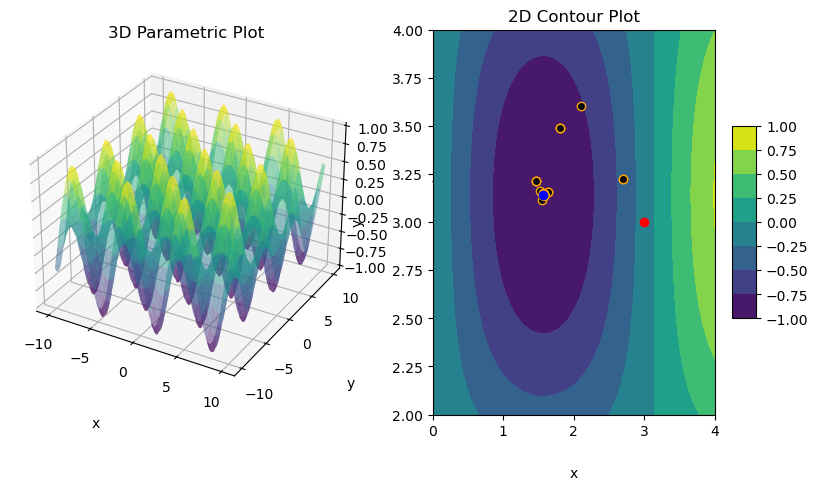

In [12]:
# Create Plots
fig= plt.figure(figsize=(10,5))

# Subplot 1: 3D Parametric Plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.grid()
surf = ax.plot_surface(X, Y, Z, cmap=plt.get_cmap('viridis'),alpha= 0.5 )
ax.set_title('3D Parametric Plot')

ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('f', labelpad=20)


# Subplot 2: 2D Contour Plot
ax = fig.add_subplot(1, 2, 2)
surf = ax.contourf(X, Y, Z, cmap=plt.get_cmap('viridis') )
ax.set_title('2D Contour Plot')
fig.colorbar(surf, shrink=0.5, aspect=8)

nit= len(indepvar_all)

it=0; plt.scatter(indepvar_all[it][0], indepvar_all[it][1] , c='r') #init

for it in np.arange(1,nit): 
    plt.scatter(indepvar_all[it][0], indepvar_all[it][1],  c='black', edgecolors='orange', alpha=1)

plt.scatter(indepvar_all[it][0], indepvar_all[it][1], c='b') #end

ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)

# Set the limits of the plot to zoom in on the interesting region
ax.set_xlim([0, 4])
ax.set_ylim([2,4])

plt.show()

***
## Exercise 2: Non-linear regression with gradient descent

We will now use the gradient descent to minimize the error of the regression. The aim is to find the coefficients $\boldsymbol{\beta}$ (defining the non-linear regression model) that minimize the reconstruction error of a funciton $f$:

- Non linear function : $f(x)$
- Regression: $\hat{\beta} = \textit{argmin}\{ || y - f(x) ||^2 \}$

Therefore, we need to define $y=y(\boldsymbol{\beta},x)$

### Non-linear function to regress

The function that we will try to regress is: y = sin(x) + sin(1.5x) + sin(2x)<br>
For the training, to make it realistic, some noise is added to the data

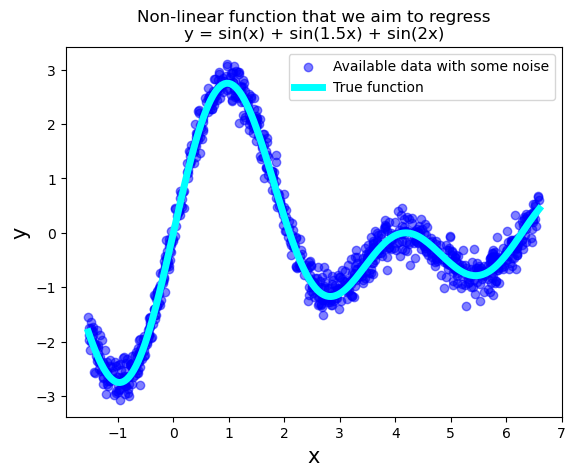

In [27]:
# function to regress:
def non_linear_func_orig(x):
    y = np.sin(x) + np.sin(1.5*x) + np.sin(2*x)
    return y

def non_linear_func(x):
    y = np.sin(x) + np.sin(1.5*x) + np.sin(2*x) + 0.20*np.random.randn(x.size) 
    return y
    
# This code is used to create our synthetic dataset
size = 1000
seed = 42
np.random.seed(seed)

x = np.random.rand(size) * 2.6*np.pi - np.pi/2
y = non_linear_func(x)

x_orig = np.linspace(x.min(), x.max(), 200)
y_orig = non_linear_func_orig(x_orig)

# We can plot the dataset and the original non-linear function
plt.scatter(x, y, label = "Available data with some noise", c='b', alpha=0.5)
plt.plot(x_orig, y_orig, label = "True function", c='cyan', lw=5)
plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)
plt.title("Non-linear function that we aim to regress\ny = sin(x) + sin(1.5x) + sin(2x)")
plt.legend()
plt.show()

### First test with a linear model

Let's try first using a linear model and see what we get. Use the LinearRegression function from sklearn seen in previous session to build your linear model.

$y_{pred,\; linear}(\boldsymbol{\beta},x) = \beta_0 + \beta_1 x $

What do you observe?

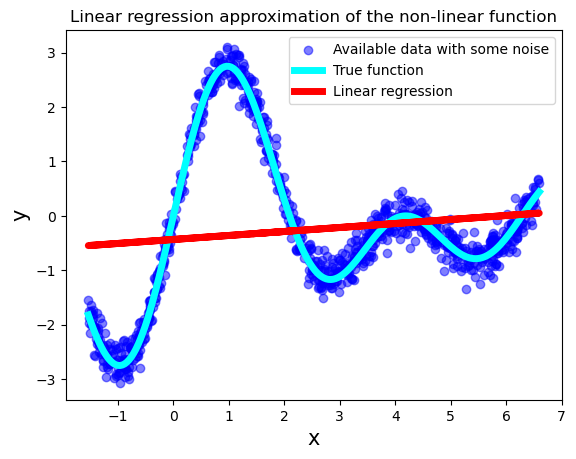

In [ ]:
from sklearn.linear_model import LinearRegression

#reshape the input and output for the LinearRegression function
x_reshaped = x.reshape(-1,1)
y_reshaped = y.reshape(-1,1)

# Create the linear regression object (use the reshaped x and y arrays)
Linear_reg = ...

# Predict the function values with the linear regression model (use the reshaped x array)
y_pred_linear = ...

# Plot linear approximation of the linear model and compare with the true function
plt.scatter(x, y, label = "Available data with some noise", c='b', alpha=0.5)
plt.plot(x_orig, y_orig, label = "True function", c='cyan', lw=5)
plt.plot(..., ..., label = "Linear regression", color = "red", lw = 5) #Fill in the missing values with what you just computed
plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)
plt.title("Linear regression approximation of the non-linear function")
plt.legend()
plt.show()

### Create the non-linear regression model

Let's define $y=y(\boldsymbol{\beta},x)$.

As we know that the solution is sinusoidal, we can use this information and create:

$y_{pred}(\boldsymbol{\beta},x) = \beta_0 + \beta_1 \sin(\beta_2 x)  + \beta_3 \sin(\beta_4 x)  +\beta_5 \sin(\beta_6 x) $

By adding non-linear terms to the function, we will be able to approximate our non-linear target function.

╌╌╌╌╌╌╌╌╌╌

Things to do:
- Define the function $y(\boldsymbol{\beta},x) = \beta_0 + \beta_1 \sin(\beta_2 x)  + \beta_3 \sin(\beta_4 x)  +\beta_5 \sin(\beta_6 x) $
- Define the RRMSE as : $\frac{|| y - f(x) ||^2}{|| f(x)||^2} $ (use LA.norm)

- Try to select the best $\beta$ manually
- Plot the solution

The reconstruction error according to the RRMSE is 1.17


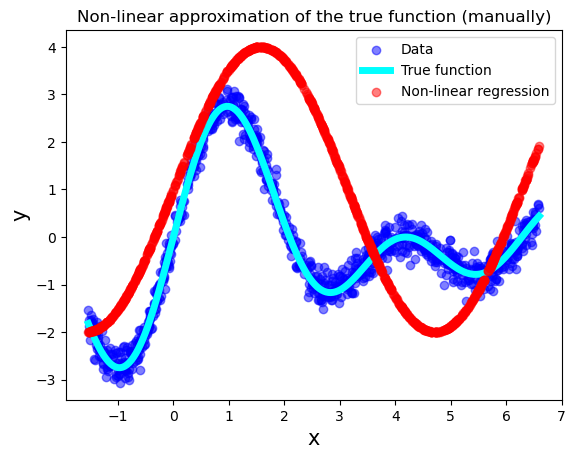

In [ ]:
import scipy.linalg as LA

# The non-linear regression
def y_reg(x, beta):
    y_pred = ... 
    return y_pred

# Metric to measure the error of the prediction (use LA.norm)
def rrmse(y, y_pred):
    return ...

beta0  = ... #initialize the weights beta
y_pred = ... #predict the y-values given the x and beta
err    = ... #compute the error of the prediction

print(f"The reconstruction error according to the RRMSE is {err:.2f}")

# We can plot the dataset and the original non-linear function
plt.scatter(x, y, c='b', alpha=0.5, label = 'Data', zorder = 1) 
plt.plot(x_orig, y_orig, c='cyan', lw=5, label = 'True function', zorder = 2)
plt.scatter(x, y_pred, c='r', alpha=0.5, label = 'Non-linear regression', zorder = 3) 

plt.legend()
plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)
plt.title("Non-linear approximation of the true function (manually)")
plt.show()

###  Use Gradient Descent for obtaining the minimum error

Using the gradient descent algorithm, the beta-values will be updated to minimize the reconstruction error.

To do:
- Define a function that calculates the error as a function of $\beta$ (the coefficients), $x$ (x - axis) and $y$ (the correspondant y for the x given). Hint: Use the functions you defined in the previous section.

- Obtain the $\boldsymbol{\beta}_{opt}$
- Obtain the error for $\boldsymbol{\beta}_{opt}$
- Obtain and plot the reconstruction of y: $y_{pred}(\boldsymbol{\beta}_{opt},\boldsymbol{x})$ 

Check the documentation:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html

In [ ]:
#Hint: use the functions you defined above
def error_regression(beta, x,y):
    y_pred = ...
    error = ...
    return error

beta0 = ... #initialize the weights beta
[beta_opt, beta_all] = ... #Use scipy.optimize.fmin

print(f'')
print(f'beta_opt = {beta_opt}')
print(f'error    = {...}') #compute the error using the optimized weights
y_pred = ... #compute the predicted y-values

Optimization terminated successfully.
         Current function value: 0.154212
         Iterations: 799
         Function evaluations: 1213

beta_opt = [ 0.06972596  1.30097286  1.11270359 -0.26883082 -1.47191729  1.31366954
  1.88723056]
error    = 0.15421151847928857


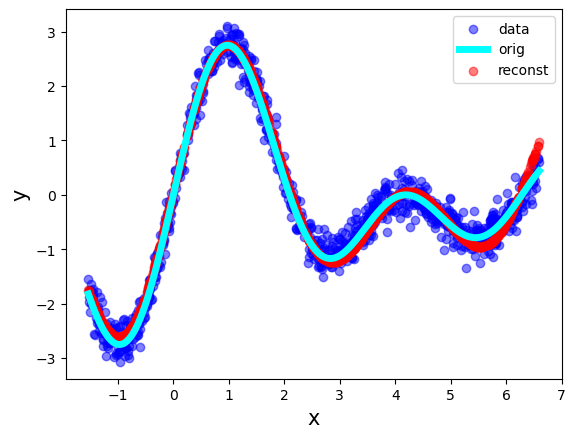

In [17]:
# We can plot the dataset, the original non-linear function and the reconstructed
plt.scatter(x, y, c='b', alpha=0.5, label = 'data') 
plt.plot(x_orig, y_orig, c='cyan', lw=5, label = 'orig' )
plt.scatter(x, y_pred, c='r', alpha=0.5, label = 'reconst') 

plt.legend()
plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)
plt.show()

### Implement yourself the gradient descent algorithm to this case

To better understand what is happening, we will implement ourselves the gradient descent algorithm for this case.<br>
Here, the library from PyTorch will be used as it contains tools to compute the gradient of functions.

First, install and import the PyTorch library

In [18]:
!pip install torch

import torch

DEPRECATION: Loading egg at c:\users\admin\anaconda3\lib\site-packages\openmore-1.0.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


The dataset is recreated in Torch to be able to apply its tools on it

In [19]:
def non_linear_func_torch(x):
    y = torch.sin(x) + torch.sin(1.5 * x) + torch.sin(2 * x) + 0.20 * torch.randn_like(x)
    return y

size = 1000
seed = 42
torch.manual_seed(seed)

x_torch = torch.rand(size) * 2.6 * torch.pi - torch.pi / 2
y_torch = non_linear_func_torch(x_torch)

The function, the error metric and the error function are also implemented again in PyTorch

In [ ]:
# Get the y-value of the function given x and the weights beta
def y_reg_torch(x, beta):
    y_pred = beta[0] + beta[1]*torch.sin(beta[2]*x) + beta[3]*torch.sin(beta[4]*x) + beta[5]*torch.sin(beta[6]*x)
    return y_pred

# Compute the relative error between the true and predicted value
def rrmse_torch(y, y_pred):
    return torch.norm(y_pred - y) / torch.norm(y)

# Given the input x, the output y and the weights Beta, return the error
def error_regression_torch(beta, x, y):
    y_pred = y_reg_torch(x, beta) 
    error = rrmse_torch(y , y_pred)
    return error

Given the functions above, write the gradient descent algorithm like in exercise one.<br>
Here, the gradient will be computed with respect to the beta's and the goal is to minimize the error between the true y-values and the predicted y-values of our regression model.

In [ ]:
nbr_it = 1000 #number of iterations
learning_rate = 0.01 #learning rate
Beta = torch.randn((7,), requires_grad=True) #We initialize the weights beta and we indicate that we want to compute the gradient on it

history_error = torch.zeros(nbr_it) #initialize the tensor to store the errors

for i in range(nbr_it):

    #Hint: use the functions above

    # Compute the predicted y-values given the current beta and x-values
    y_pred = ...

    # Compute the error given the true and predicted y-values
    error = ...
    error.backward() #the gradients are computed with respect to Beta given the error

    # Retrieve the gradient value that have just been computed by the backward function
    gradient = Beta.grad

    # Update the weights Beta given the gradient and the learning rate
    Beta = ...

    # Create a copy of the current Beta value to be able to recompute the gradient on it on the next iteration
    Beta = Beta.detach().requires_grad_(True)

    # Store the history of the errors to plot it afterwards
    history_error[i] = error.detach()

Check the convergence by plotting the error over the iterations.<br>
Did the algorithm converge?

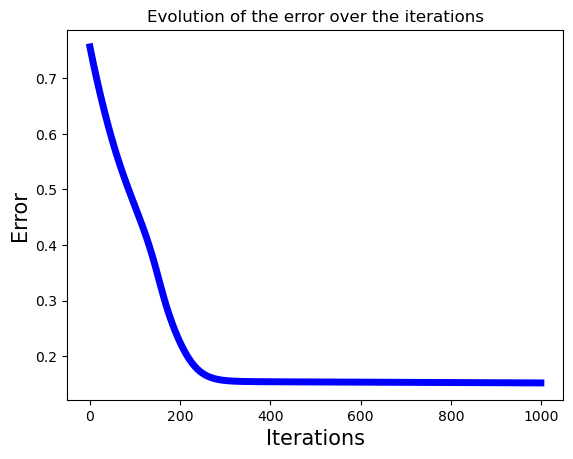

In [22]:
plt.plot(history_error, lw = 5, color = "blue")
plt.xlabel("Iterations", fontsize = 15)
plt.ylabel("Error", fontsize = 15)
plt.title("Evolution of the error over the iterations")
plt.show()

Check the obtained Beta values and see if the non-linear regression model matches the data

In [ ]:
print(f'beta_opt = {Beta.detach().numpy()}')
print(f'error    = {error_regression_torch(Beta,x_torch,y_torch)}')
y_pred_torch = ... #compute the predicted y-values given the optimal beta and x-values

beta_opt = [ 0.03236027  1.3064718   1.115404   -0.33413288 -1.5360857   1.2482432
  1.8964291 ]
error    = 0.1517823040485382


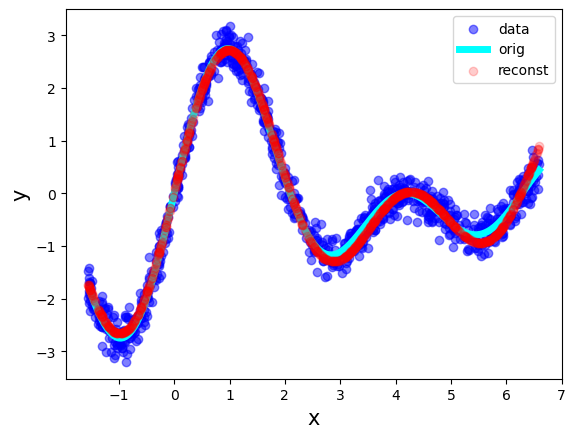

In [24]:
# We can plot the dataset, the original non-linear function and the reconstructed
plt.scatter(x_torch, y_torch, c='b', alpha=0.5, label = 'data', zorder = 1) 
plt.plot(x_orig, y_orig, c='cyan', lw=5, label = 'orig', zorder = 2)
plt.scatter(x_torch, y_pred_torch.detach().numpy(), c='r', alpha=0.2, label = 'reconst', zorder = 3) 

plt.legend()
plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)
plt.show()